# Step 2: Calculate Statistics by Split

This notebook reads the CSV files produced in the `split_by_label` directory (from Step 1), calculates key statistics, generates a summary table, and creates two bar charts:
1. A bar chart for the **count of samples** per label.
2. A bar chart for the **average flow_duration** per label.

## 1. Import Required Libraries
We will use the following libraries:
- **os** and **glob** for file operations
- **pandas** for data manipulation
- **matplotlib.pyplot** for plotting the bar charts

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
# Ensures that plots render inline in Jupyter Notebook

## 2. Read Split CSV Files
Assuming that after running Step 1, each label subset was saved as a separate CSV in the `./split_by_label` directory, we read all these CSV files into a list of DataFrames.

In [2]:
# Define the directory containing the split CSV files
split_dir = "./split_by_label"
file_pattern = os.path.join(split_dir, "*.csv")

# Find all CSV files in the directory
split_files = glob.glob(file_pattern)
print("Number of split CSV files found:", len(split_files))

# Load each CSV into a DataFrame and store them in a list
df_list = []
for file in split_files:
    # Extract label name from filename (assuming the filename format is <label>.csv)
    label_name = os.path.splitext(os.path.basename(file))[0]
    temp_df = pd.read_csv(file)
    temp_df["label"] = label_name  # Ensure consistent label column
    df_list.append(temp_df)

# Combine all subsets into one DataFrame
data_combined = pd.concat(df_list, ignore_index=True)
print("Combined dataset shape after reading split files:", data_combined.shape)

Number of split CSV files found: 34
Combined dataset shape after reading split files: (2366956, 47)


## 3. Calculate Aggregated Statistics
We will focus on the following columns for demonstration:
- **flow_duration**
- **Rate**

The steps are:
1. **Group** the data by `label`.
2. **Count** the number of samples per label.
3. Compute the **mean** of `flow_duration` and `Rate` for each label.
4. Merge these results into a single summary table.

In [3]:
# Group by label
grouped = data_combined.groupby("label", as_index=False)

# Calculate the count of samples for each label
label_counts = grouped.size().rename(columns={"size": "count"})

# Calculate the mean of flow_duration and Rate
mean_flow_duration = grouped["flow_duration"].mean().rename(columns={"flow_duration": "flow_duration_mean"})
mean_rate = grouped["Rate"].mean().rename(columns={"Rate": "rate_mean"})

# Merge all statistics into a single summary DataFrame
summary_df = label_counts.merge(mean_flow_duration, on="label")
summary_df = summary_df.merge(mean_rate, on="label")

# Display the summary table
print("### Summary Table of Statistics by Label ###")
display(summary_df)

### Summary Table of Statistics by Label ###


,label,count,flow_duration_mean,rate_mean
0,Backdoor_Malware,169,457.180208,2776.544200
1,BenignTraffic,55859,39.186484,1958.624386
2,BrowserHijacking,295,96.303571,1075.756655
3,CommandInjection,243,164.578187,974.863118
4,DDoS-ACK_Fragmentation,14498,0.394579,12112.204104
5,DDoS-HTTP_Flood,1467,75.140634,7449.670753
6,DDoS-ICMP_Flood,364557,0.440446,11507.140598
7,DDoS-ICMP_Fragmentation,22890,0.975791,15334.349453
8,DDoS-PSHACK_Flood,207971,0.120227,5810.022135
9,DDoS-RSTFINFlood,204892,0.138348,10174.459961


## 4. Create Bar Charts
We will create two bar charts:
1. **Bar Chart of Sample Counts** per label.
2. **Bar Chart of Average flow_duration** per label.

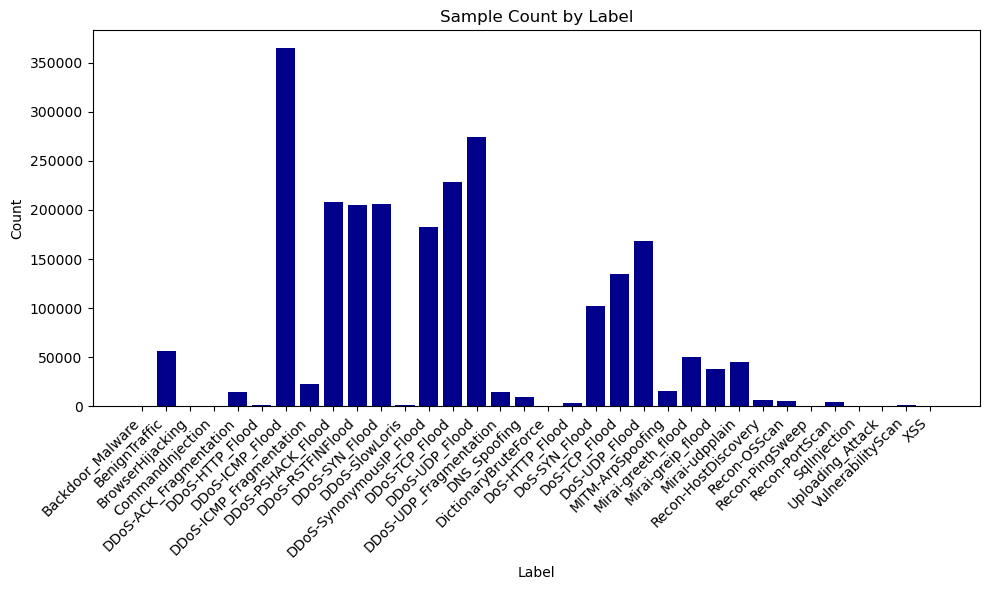

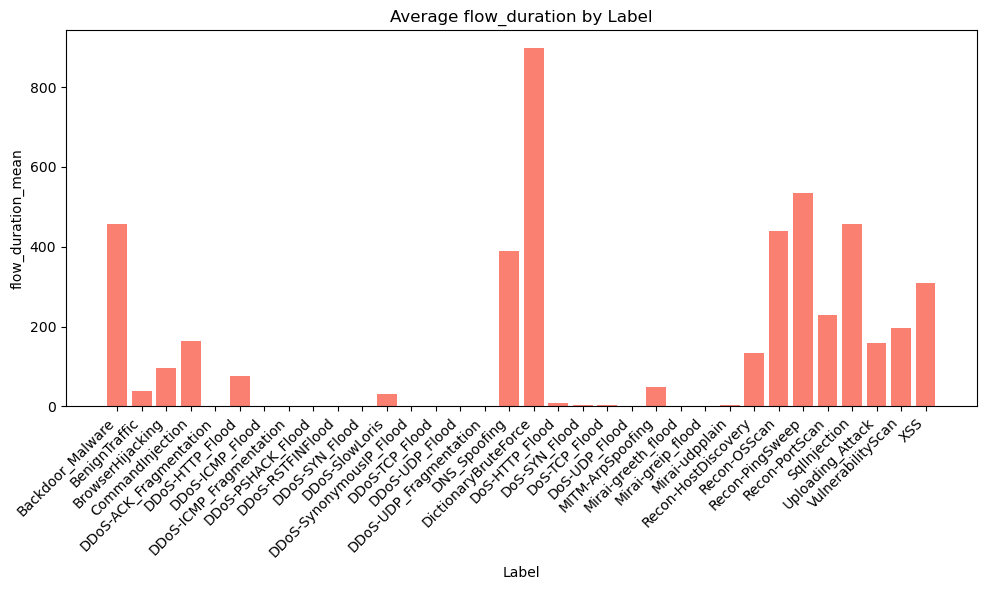

In [4]:
# Bar Chart 1: Sample counts per label
plt.figure(figsize=(10, 6))
plt.bar(summary_df["label"], summary_df["count"], color="darkblue")
plt.title("Sample Count by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Bar Chart 2: Average flow_duration per label
plt.figure(figsize=(10, 6))
plt.bar(summary_df["label"], summary_df["flow_duration_mean"], color="salmon")
plt.title("Average flow_duration by Label")
plt.xlabel("Label")
plt.ylabel("flow_duration_mean")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 5. Conclusion
In this step, we loaded the split-by-label CSV files from Step 1, calculated key statistics, built a summary table, and visualized two bar charts:
1. The distribution of sample counts per attack label.
2. The mean `flow_duration` per attack label.

These results provide insights into the frequency and duration of different attack types. This baseline analysis can be extended with additional metrics and visualizations as needed.